<a href="https://colab.research.google.com/github/peeka-boo0/ml-learning-journey/blob/main/notebooks/Day_12_pipeline_and_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Load data
digits = load_digits()

# Step 1: Build a pipeline #the pipe line is helping in fit the pca in cv folds train set
#the pca only helps in reducing the feactures of the data set where we have too much feactures makes space and timecomplexty bad
pipe = Pipeline([
    ("pca", PCA()),  # reduce dimensionality #the pca make new feactures by the combination of all feactures combin to form mthe new feactures and only contaion on new feactures only
    ("rf", RandomForestClassifier(random_state=42))  # classifier
])

# Step 2: Define parameter grid
param_grid = {
    "pca__n_components": [20, 40, 60],        # PCA: how many features to keep #the grid give the 60 as best pm cozz this data set alrady have few feacture and all the feactures are importan too store each pixel values
    "rf__n_estimators": [100, 200],           # Random Forest: number of trees
    "rf__max_depth": [10, 20, None]           # Random Forest: tree depth
}

# Step 3: GridSearch
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy", n_jobs=-1) #using the grid search for keeping the high acc model make by pca cozz the new feactures dont give the high acc
grid.fit(digits.data, digits.target)

# Step 4: Results
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best parameters: {'pca__n_components': 60, 'rf__max_depth': 20, 'rf__n_estimators': 200}
Best CV score: 0.9349086969978335


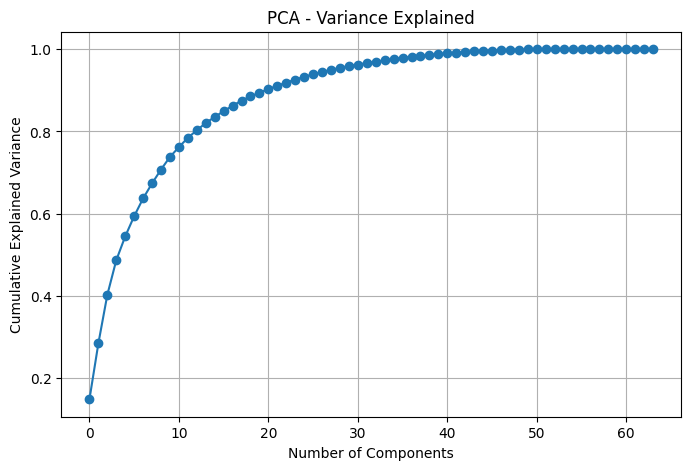

In [1]:
#ai code for visual represention

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

# Load data
digits = load_digits()

# Fit PCA
pca = PCA().fit(digits.data)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.grid()
plt.show()
